# Satellite Source catalog to SIMPUT format


A simple script to take sources from VOtable from ESAsky and turn it into a SIMPUT compatible source catalog. Note that all sources are assigned the same spectrum!

### Requirements
<ul>
    <li>A source catalog (in this case in VOT format)</li>
    <li>A starting SIMPUT file with a spectrum defined</li>
    </ul>
    

### Setup

In [1]:
import numpy as np
from astropy.io.votable import parse_single_table
from astropy.table import Table
from astropy.io import fits
from matplotlib import pyplot as plt

Source catalog downloaded from ESAsky (sky.esa.int) in the VOT format. Any format that provides postion (Ra, Dec) and flux (erg/s/cm^2) should work.

In [2]:
cat = Table.read('ASTRO_CATALOGUE_CHANDRA_SC24.vot')

SIXTE will crash if the SIMPUT catalog contains sources with NaN or 0 flux, so we remove them.

In [3]:
cat.remove_rows(np.isnan(cat['flux_aper_b']))

In [4]:
cat

name,ra,dec,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,extent_flag,sat_src_flag,streak_src_flag,var_flag,var_inter_hard_flag,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,var_intra_index_b,var_intra_index_w,var_inter_index_b,var_inter_index_w,var_inter_hard_prob_hm,var_inter_hard_prob_ms,acis_time,hrc_time
,deg,deg,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,erg·cm-2·s-1,arcsec,arcsec,deg,,,,,,,,,,,,,,,,,,,,,,seconds,seconds
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2CXO J235706.7-323955,359.2779564562935,-32.665550001284764,2.4549449936422e-14,1.7150985572021e-14,3.1611620466077e-14,--,--,--,2.1663974448317e-14,1.6789580197446e-14,2.6538368699188e-14,--,--,--,10.269090407040933,7.222422923870839,102.4798960183896,2.9767441860465533,25.74376124120502,MARGINAL,--,1.0,--,--,--,--,0.066208619612742,-0.35540287320425,0.38663335415365,-0.17613991255465,-0.47282948157402,0.19925046845721,--,--,5.0,--,3.7021710299622868e-06,1.6474444997083282e-07,131407.60517940499,--
2CXO J235718.0-324003,359.32511661503395,-32.667521492697986,2.1716236972852e-15,4.4930145461073e-16,3.8190623641912e-15,--,--,--,2.1716236972852e-15,4.4930145461073e-16,3.8190623641912e-15,--,--,--,2.6262021440886905,2.082970703017014,29.55891416011025,5.371428571428645,50.90683915036034,TRUE,--,--,--,--,--,1.0,0.072454715802623,-0.12054965646471,0.2367270455965,-0.18738288569644,-0.3316677076827,-0.021861336664585,--,--,--,--,1.0,0.9999999999999999,131407.60517940499,--
2CXO J235716.8-323937,359.3202665688773,-32.66032286769559,1.2923612112447e-14,8.3623372492307e-15,1.7231482816597e-14,--,--,--,4.7184106188227e-15,2.3592053094113e-15,7.077615928234e-15,--,--,--,5.910429236120081,5.9104300352942625,--,3.636363636363573,15.827213139329444,MARGINAL,--,--,--,--,--,--,0.99937539038101,0.73391630231106,1.0,-0.99937539038101,-1.0,-0.76889444097439,--,--,6.0,--,--,--,131407.60517940499,--
2CXO J235741.6-324656,359.4234303443268,-32.78231182371504,5.7177826926569e-14,4.7945453933154e-14,6.5867119155666e-14,--,--,--,5.7177826926569e-14,4.7945453933154e-14,6.5867119155666e-14,--,--,--,3.1286321779306854,2.3709222072139555,136.15889083579978,11.780961246893412,316.7508661972876,TRUE,--,1.0,--,--,--,--,-0.013741411617739,-0.1317926296065,0.094316052467208,-0.27732667083073,-0.35415365396627,-0.19550281074329,--,--,--,--,--,--,58840.191219322,--
2CXO J235750.2-324550,359.4595044238788,-32.76404142252165,7.8188191675553e-15,5.7917179018929e-16,1.5058466544921e-14,--,--,--,7.8188191675553e-15,5.7917179018929e-16,1.5058466544921e-14,--,--,--,5.078504152530189,4.34475387890402,107.58463242336127,2.91428571428582,58.53705814031293,TRUE,--,--,--,--,--,--,-0.99937539038101,-1.0,-0.24047470331043,-0.43098063710181,-0.62273579013117,-0.20674578388507,--,--,--,--,--,--,58840.191219322,--
2CXO J235723.3-324216,359.34721275253537,-32.704703632000694,1.176292143886e-14,7.0164794547588e-15,1.6302996380175e-14,--,--,--,5.4293895480931e-15,2.7146947740465e-15,8.0309720398876e-15,--,--,--,4.213778942783915,3.5505112961728518,100.82571350385373,4.256410256410278,29.621544086569315,TRUE,--,--,--,--,--,1.0,0.37976264834478,0.038101186758276,0.65896314803248,-0.65584009993754,-0.81761399125547,-0.46283572767021,--,--,--,--,0.7397636110685,4.6771178100479815e-06,131407.60517940499,--
2CXO J235727.4-324300,359.3642416601276,-32.716901279

Plotting just to make sure we cover the right kind patch of sky. 

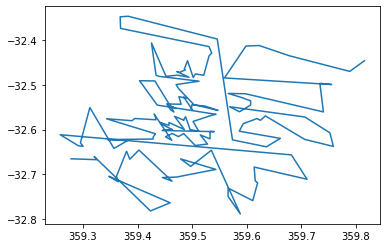

In [5]:
plt.plot(cat['ra'], cat['dec'])

### Work
We need an already created SIMPUT file to start with. The source in that file is irrelevant, but we do need the 'SPECTRUM' extension. See the SIXTE manual on how to create a simple SIMPUT file.

In [6]:
hdulist = fits.open("src_p13.simput")

In [7]:
input_src_cat = hdulist[1]

In [8]:
input_spectrum = hdulist[2]

This is the spectrum that we will use for all sources.

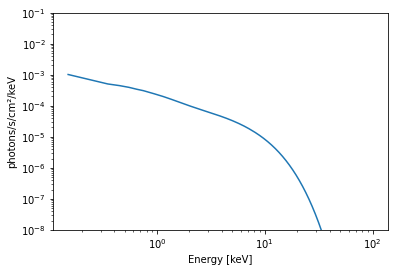

In [9]:
energy_grid = input_spectrum.data['ENERGY'][0]  ## the [0] is only the first row,
photon_flux = input_spectrum.data['FLUXDENSITY'][0] # PHOTONS/s/cm^2/keV
plt.plot(energy_grid, photon_flux)
plt.ylim([1e-8,1e-1])
plt.xlabel("Energy [keV]")
plt.ylabel("photons/s/cm²/keV")
plt.loglog()
plt.show()

Number of sources we want to include. Probably you want the whole input catalog in the end, but maybe fewer sources for testing purposes

In [10]:
numsrc = len(cat)

In [11]:
new_src_cat = fits.BinTableHDU.from_columns(input_src_cat.columns, nrows=numsrc)
new_src_cat.header = input_src_cat.header.copy()   # copy all header keywords

This loop does all the work.

In [12]:
for ii in range(numsrc):
    print(cat[ii]['name'])
    new_src_cat.data[ii] = (new_src_cat.data.copy())[0]   # copy the complete information of the first source
    new_src_cat.data[ii]['SRC_ID'] = ii+1   # set the SRC ID
    new_src_cat.data[ii]['FLUX'] = cat[ii]['flux_aper_b']
    new_src_cat.data[ii]['RA'] = cat[ii]['ra']
    new_src_cat.data[ii]['DEC'] = cat[ii]['dec']

2CXO J235706.7-323955
2CXO J235718.0-324003
2CXO J235716.8-323937
2CXO J235741.6-324656
2CXO J235750.2-324550
2CXO J235723.3-324216
2CXO J235727.4-324300
2CXO J235726.6-324217
2CXO J235731.1-323854
2CXO J235732.5-323959
2CXO J235736.5-323845
2CXO J235751.1-324256
2CXO J235746.9-324227
2CXO J235753.0-324223
2CXO J235810.3-324121
2CXO J235754.8-323956
2CXO J235759.3-324057
2CXO J235808.4-323847
2CXO J235821.1-324720
2CXO J235815.7-324458
2CXO J235815.8-324352
2CXO J235826.6-324533
2CXO J235828.7-324309
2CXO J235827.7-324254
2CXO J235827.2-324102
2CXO J235850.4-324240
2CXO J235843.6-323924
2CXO J235701.9-323641
2CXO J235709.9-323811
2CXO J235712.0-323815
2CXO J235710.8-323747
2CXO J235714.9-323303
2CXO J235725.5-323832
2CXO J235731.4-323729
2CXO J235722.7-323720
2CXO J235742.7-323716
2CXO J235742.9-323657
2CXO J235743.8-323634
2CXO J235722.3-323433
2CXO J235733.5-323448
2CXO J235734.6-323431
2CXO J235743.9-323441
2CXO J235743.9-323421
2CXO J235743.2-323355
2CXO J235751.0-323726
2CXO J2357

Yep, looks good.

In [13]:
new_src_cat.data[1]

(2, '', 359.32511661503395, -32.667521492697986, 0.0, 1.0, 0.3, 15.0, 2.1716237e-15, '[SPECTRUM,1]', 'NULL', 'NULL')

### Saving
Creating and writing the final output SIMPUT file. Important to append the Spectrum extension!

In [14]:
output_hdulist = fits.HDUList(fits.PrimaryHDU())
output_hdulist.append(new_src_cat)  # add the new SRC_CAT we created
output_hdulist.append(input_spectrum)
output_hdulist.writeto('ngc7793_csc2.simput', overwrite='True')

In [15]:
print(new_src_cat.data)

[(  1, '', 359.27795646, -32.66555   , 0., 1., 0.3, 15., 2.45494492e-14, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  2, '', 359.32511662, -32.66752149, 0., 1., 0.3, 15., 2.17162371e-15, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  3, '', 359.32026657, -32.66032287, 0., 1., 0.3, 15., 1.29236120e-14, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  4, '', 359.42343034, -32.78231182, 0., 1., 0.3, 15., 5.71778275e-14, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  5, '', 359.45950442, -32.76404142, 0., 1., 0.3, 15., 7.81881883e-15, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  6, '', 359.34721275, -32.70470363, 0., 1., 0.3, 15., 1.17629210e-14, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  7, '', 359.36424166, -32.71690128, 0., 1., 0.3, 15., 4.25753911e-15, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  8, '', 359.36118672, -32.70478549, 0., 1., 0.3, 15., 9.32353305e-15, '[SPECTRUM,1]', 'NULL', 'NULL')
 (  9, '', 359.37962776, -32.64860731, 0., 1., 0.3, 15., 2.12030113e-15, '[SPECTRUM,1]', 'NULL', 'NULL')
 ( 10, '', 359.38554537, -32.66646171, 0., 1., 0.3, 15.

## Caveats

<ul>
<li>This SIMPUT file does not contain a background! For a propoer SIXTE simulation this has to be included either via the XML file of SIXTE or added manually to the SIMPUT file.</li>
    <li>As mentioned, all sources have the same spectrum (this can of course be changed with some addition to this code</li>
    </ul>